# Paju

In [145]:
%load_ext autoreload
%autoreload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import random
from mpl_toolkits import mplot3d

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy import stats

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

from mlp_regression import mlp_regression, model_validation, mlp_prediction, mlp_prediction_error, errorDist, \
                            mlp_train_multi_graph, mlp_train_multi_graph_comb, mlp_train_multi_3dgraph_comb, \
                            ann_train_graph, mlp_multiple_models_train_graph
from guassian_process import gp_regression, prediction_rmse_error, gp_train_graph, gp_linear_compare_graph
from utils import combineArray, multiArraySort, data_loader_from_csv, data_loader_pathloss, describeData, data_loader_pathloss_with_freq

pd.set_option('display.max_rows', 999)
pd.set_option('precision', 5)

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Winter: Distance-Pathloss

In [218]:
%autoreload
X_train_m_400, X_test_m_400, y_train_m_400, y_test_m_400, X_train_s_400, X_test_s_400, y_train_s_400, y_test_s_400 = data_loader_from_csv('../data/PLdata_paju_wt_400.csv', np.log10(400), 'distance', [1,6], testRatio=0.2, log = True)
X_train_m_1399, X_test_m_1399, y_train_m_1399, y_test_m_1399, X_train_s_1399, X_test_s_1399, y_train_s_1399, y_test_s_1399 = data_loader_from_csv('../data/PLdata_paju_wt_1399.csv', np.log10(1399),'distance', [1,6], testRatio=0.2, log = True)
X_train_m_2249, X_test_m_2249, y_train_m_2249, y_test_m_2249, X_train_s_2249, X_test_s_2249, y_train_s_2249, y_test_s_2249 = data_loader_from_csv('../data/PLdata_paju_wt_2249.csv', np.log10(2249),'distance', [1,6], testRatio=0.2, log = True)

X_train_m = combineArray(X_train_m_400, X_train_m_1399, X_train_m_2249)
y_train_m = combineArray(y_train_m_400, y_train_m_1399, y_train_m_2249)
X_test_m = combineArray(X_test_m_400, X_test_m_1399, X_test_m_2249)
y_test_m = combineArray(y_test_m_400, y_test_m_1399, y_test_m_2249)

X_train_s = combineArray(X_train_s_400, X_train_s_1399, X_train_s_2249)
y_train_s = combineArray(y_train_s_400, y_train_s_1399, y_train_s_2249)
X_test_s = combineArray(X_test_s_400, X_test_s_1399, X_test_s_2249)
y_test_s = combineArray(y_test_s_400, y_test_s_1399, y_test_s_2249)

dataX_m, dataY_m = [X_train_m_400, X_train_m_1399, X_train_m_2249], [y_train_m_400, y_train_m_1399, y_train_m_2249]
sample_amount = 2000
X_train_m_400_sampled = X_train_m_400[np.random.choice(X_train_m_400.shape[0], sample_amount, replace=False)]
X_train_m_1399_sampled = X_train_m_1399[np.random.choice(X_train_m_1399.shape[0], sample_amount, replace=False)]
X_train_m_2249_sampled = X_train_m_2249[np.random.choice(X_train_m_2249.shape[0], sample_amount, replace=False)]
X_train_m_sampled = X_train_m[np.random.choice(X_train_m.shape[0], sample_amount, replace=False)]

y_train_m_400_sampled = y_train_m_400[np.random.choice(y_train_m_400.shape[0], sample_amount, replace=False)]
y_train_m_1399_sampled = y_train_m_1399[np.random.choice(y_train_m_1399.shape[0], sample_amount, replace=False)]
y_train_m_2249_sampled = y_train_m_2249[np.random.choice(y_train_m_2249.shape[0], sample_amount, replace=False)]
y_train_m_sampled = y_train_m[np.random.choice(y_train_m.shape[0], sample_amount, replace=False)]

X_test_m_400_sampled = X_test_m_400[np.random.choice(X_test_m_400.shape[0], sample_amount, replace=False)]
X_test_m_1399_sampled = X_test_m_1399[np.random.choice(X_test_m_1399.shape[0], sample_amount, replace=False)]
X_test_m_2249_sampled = X_test_m_2249[np.random.choice(X_test_m_2249.shape[0], sample_amount, replace=False)]
X_test_m_sampled = X_test_m[np.random.choice(X_test_m.shape[0], sample_amount, replace=False)]

y_test_m_400_sampled = y_test_m_400[np.random.choice(y_test_m_400.shape[0], sample_amount, replace=False)]
y_test_m_1399_sampled = y_test_m_1399[np.random.choice(y_test_m_1399.shape[0], sample_amount, replace=False)]
y_test_m_2249_sampled = y_test_m_2249[np.random.choice(y_test_m_2249.shape[0], sample_amount, replace=False)]
y_test_m_sampled = y_test_m[np.random.choice(y_test_m.shape[0], sample_amount, replace=False)]

dataX_m_sampled, dataY_m_sampled = [X_train_m_400_sampled, X_train_m_1399_sampled, X_train_m_2249_sampled], [y_train_m_400_sampled, y_train_m_1399_sampled, y_train_m_2249_sampled]

original: 110440
filtered: 47125
- moving type: total: 35897 (training: 28717/validation: 7180)
- stationary type: total: 11228 (training: 8982/validation: 2246)
original: 110358
filtered: 47071
- moving type: total: 35843 (training: 28674/validation: 7169)
- stationary type: total: 11228 (training: 8982/validation: 2246)
original: 110246
filtered: 47005
- moving type: total: 35776 (training: 28620/validation: 7156)
- stationary type: total: 11229 (training: 8983/validation: 2246)


<Paju - Winter> Linear (dist<=6000m)


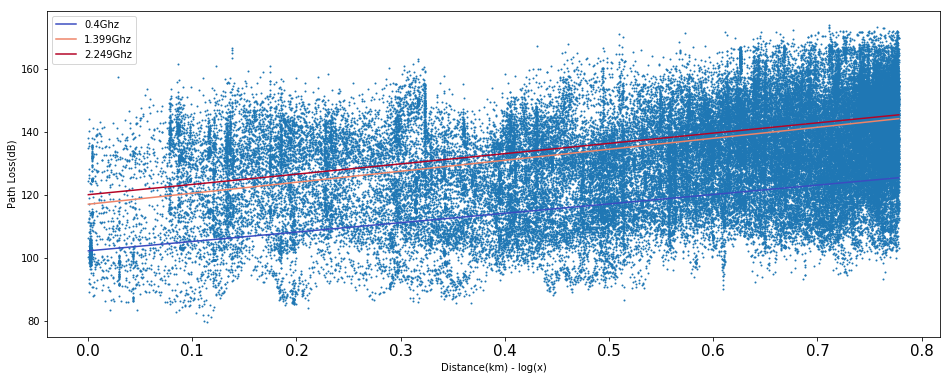

TEST ERROR(dB),RMSE,MAE,MAPE,MSLE,R2
0.4Ghz,10.75974,8.70087,7.43130,0.00820,0.24177
1.399Ghz,12.20464,10.06980,7.54572,0.00822,0.24597
2.249Ghz,11.51865,9.30543,6.91046,0.00723,0.25052
Overall,11.63125,9.45089,7.36296,0.00803,0.46602


In [219]:
%autoreload
linear_400_model = LinearRegression().fit(X_train_m_400, y_train_m_400)
linear_1399_model = LinearRegression().fit(X_train_m_1399, y_train_m_1399)
linear_2249_model = LinearRegression().fit(X_train_m_2249, y_train_m_2249)
linear_over_model = LinearRegression().fit(X_train_m, y_train_m)

print("<Paju - Winter> Linear (dist<=6000m)")
# mlp_train_multi_3dgraph_comb(ann_relu_model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

pred_train_400 = linear_400_model.predict(X_train_m_400)
pred_train_1399 = linear_1399_model.predict(X_train_m_1399)
pred_train_2249 = linear_2249_model.predict(X_train_m_2249)
pred_train_dataset = [pred_train_400, pred_train_1399, pred_train_2249]

mlp_train_multi_graph(dataX_m, dataY_m, pred_train_dataset, X_train_m[:,0], y_train_m, 'distance')

pred_test_400 = linear_400_model.predict(X_test_m_400)
pred_test_1399 = linear_1399_model.predict(X_test_m_1399)
pred_test_2249 = linear_2249_model.predict(X_test_m_2249)

pred_test_m = linear_over_model.predict(X_test_m)
stat = np.array([mlp_prediction_error(linear_400_model,X_test_m_400, y_test_m_400),mean_absolute_error(y_test_m_400, pred_test_400),mean_absolute_percentage_error(y_test_m_400, pred_test_400),mean_squared_log_error(y_test_m_400, pred_test_400),r2_score(y_test_m_400, pred_test_400),
                 mlp_prediction_error(linear_1399_model,X_test_m_1399, y_test_m_1399),mean_absolute_error(y_test_m_1399, pred_test_1399),mean_absolute_percentage_error(y_test_m_1399, pred_test_1399),mean_squared_log_error(y_test_m_1399, pred_test_1399),r2_score(y_test_m_1399, pred_test_1399),
                 mlp_prediction_error(linear_2249_model,X_test_m_2249, y_test_m_2249),mean_absolute_error(y_test_m_2249, pred_test_2249),mean_absolute_percentage_error(y_test_m_2249, pred_test_2249),mean_squared_log_error(y_test_m_2249, pred_test_2249),r2_score(y_test_m_2249, pred_test_2249),
                 mlp_prediction_error(linear_over_model,X_test_m, y_test_m), mean_absolute_error(y_test_m, pred_test_m),mean_absolute_percentage_error(y_test_m, pred_test_m),mean_squared_log_error(y_test_m, pred_test_m),r2_score(y_test_m, pred_test_m)])

(pd.DataFrame(stat.reshape((4,5)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','MSLE','R2'],name='TEST ERROR(dB)')))

<Paju - Winter> ANN-Sigmoid (dist<=6000m)


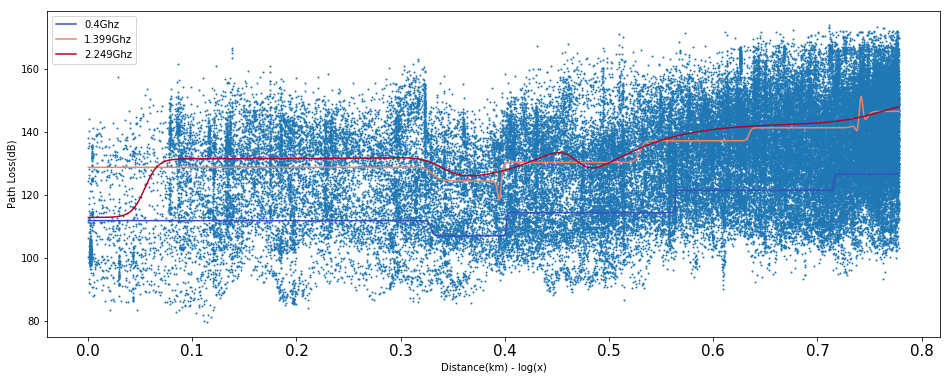

TEST ERROR(dB),RMSE,MAE,MAPE,MSLE,R2
0.4Ghz,10.45945,8.13292,6.94507,0.00776,0.28350
1.399Ghz,11.65944,9.09615,6.80528,0.00751,0.31183
2.249Ghz,11.09760,8.65904,6.41778,0.00668,0.30431
Overall,11.63125,9.19304,7.15268,0.00773,0.48532


In [220]:
%autoreload
ann_relu_400_model = mlp_regression(X_train_m_400, y_train_m_400, (60,), 'logistic', 'lbfgs')
ann_relu_1399_model = mlp_regression(X_train_m_1399, y_train_m_1399, (60,), 'logistic', 'lbfgs')
ann_relu_2249_model = mlp_regression(X_train_m_2249, y_train_m_2249, (60,), 'logistic', 'lbfgs')
ann_relu_over_model = mlp_regression(X_train_m, y_train_m, (60,), 'relu', 'lbfgs')

print("<Paju - Winter> ANN-Sigmoid (dist<=6000m)")
# mlp_train_multi_3dgraph_comb(ann_relu_model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

pred_train_400 = ann_relu_400_model.predict(X_train_m_400)
pred_train_1399 = ann_relu_1399_model.predict(X_train_m_1399)
pred_train_2249 = ann_relu_2249_model.predict(X_train_m_2249)
pred_train_dataset = [pred_train_400, pred_train_1399, pred_train_2249]

mlp_train_multi_graph(dataX_m, dataY_m, pred_train_dataset, X_train_m[:,0], y_train_m, 'distance')

pred_test_400 = ann_relu_400_model.predict(X_test_m_400)
pred_test_1399 = ann_relu_1399_model.predict(X_test_m_1399)
pred_test_2249 = ann_relu_2249_model.predict(X_test_m_2249)
pred_test_m = ann_relu_model.predict(X_test_m)

stat = np.array([mlp_prediction_error(ann_relu_400_model,X_test_m_400, y_test_m_400),mean_absolute_error(y_test_m_400, pred_test_400),mean_absolute_percentage_error(y_test_m_400, pred_test_400),mean_squared_log_error(y_test_m_400, pred_test_400),r2_score(y_test_m_400, pred_test_400),
                 mlp_prediction_error(ann_relu_1399_model,X_test_m_1399, y_test_m_1399),mean_absolute_error(y_test_m_1399, pred_test_1399),mean_absolute_percentage_error(y_test_m_1399, pred_test_1399),mean_squared_log_error(y_test_m_1399, pred_test_1399),r2_score(y_test_m_1399, pred_test_1399),
                 mlp_prediction_error(ann_relu_2249_model,X_test_m_2249, y_test_m_2249),mean_absolute_error(y_test_m_2249, pred_test_2249),mean_absolute_percentage_error(y_test_m_2249, pred_test_2249),mean_squared_log_error(y_test_m_2249, pred_test_2249),r2_score(y_test_m_2249, pred_test_2249),
                 mlp_prediction_error(ann_relu_over_model,X_test_m, y_test_m), mean_absolute_error(y_test_m, pred_test_m),mean_absolute_percentage_error(y_test_m, pred_test_m),mean_squared_log_error(y_test_m, pred_test_m),r2_score(y_test_m, pred_test_m)])

(pd.DataFrame(stat.reshape((4,5)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','MSLE','R2'],name='TEST ERROR(dB)')))

<Paju - Winter> Gaussian Process (dist<=6000m)


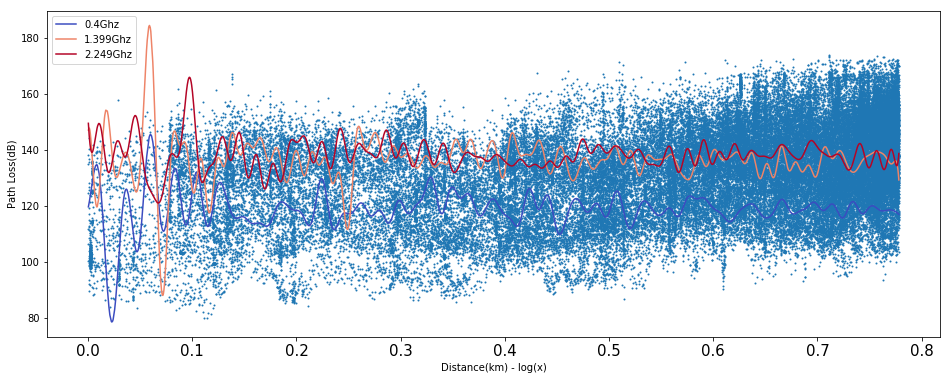

TEST ERROR(dB),RMSE,MAE,MAPE,R2
0.4Ghz,13.09083,10.41104,8.94150,-0.12236
1.399Ghz,14.70744,11.73652,8.81226,-0.09500
2.249Ghz,13.89294,11.12679,8.27213,-0.09030
Overall,18.02425,14.03931,11.07113,-0.28229


In [221]:
%autoreload
kernel = 'RBF'

gp_rbf_400_model = gp_regression(kernel, 1).fit(X_train_m_400_sampled, y_train_m_400_sampled)
gp_rbf_1399_model = gp_regression(kernel, 1).fit(X_train_m_1399_sampled, y_train_m_1399_sampled)
gp_rbf_2249_model = gp_regression(kernel, 1).fit(X_train_m_2249_sampled, y_train_m_2249_sampled)
gp_rbf_over_model = gp_regression(kernel, 1).fit(X_train_m_sampled, y_train_m_sampled)

print("<Paju - Winter> Gaussian Process (dist<=6000m)")
# mlp_train_multi_3dgraph_comb(ann_relu_model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

pred_train_400, std_400 = gp_rbf_400_model.predict(X_train_m_400, return_std=True)
pred_train_1399, std_1399 = gp_rbf_1399_model.predict(X_train_m_1399, return_std=True)
pred_train_2249, std_2249 = gp_rbf_2249_model.predict(X_train_m_2249, return_std=True)

pred_train_dataset = [pred_train_400, pred_train_1399, pred_train_2249]
data_std = [std_400, std_1399, std_2249]

mlp_train_multi_graph(dataX_m, dataY_m, pred_train_dataset, X_train_m[:,0], y_train_m, 'distance')

pred_test_400 = gp_rbf_400_model.predict(X_test_m_400)
pred_test_1399 = gp_rbf_1399_model.predict(X_test_m_1399)
pred_test_2249 = gp_rbf_2249_model.predict(X_test_m_2249)
pred_test_m = gp_rbf_over_model.predict(X_test_m)

stat = np.array([mlp_prediction_error(gp_rbf_400_model,X_test_m_400, y_test_m_400),mean_absolute_error(y_test_m_400, pred_test_400),mean_absolute_percentage_error(y_test_m_400, pred_test_400),r2_score(y_test_m_400, pred_test_400),
                 mlp_prediction_error(gp_rbf_1399_model,X_test_m_1399, y_test_m_1399),mean_absolute_error(y_test_m_1399, pred_test_1399),mean_absolute_percentage_error(y_test_m_1399, pred_test_1399),r2_score(y_test_m_1399, pred_test_1399),
                 mlp_prediction_error(gp_rbf_2249_model,X_test_m_2249, y_test_m_2249),mean_absolute_error(y_test_m_2249, pred_test_2249),mean_absolute_percentage_error(y_test_m_2249, pred_test_2249),r2_score(y_test_m_2249, pred_test_2249),
                 mlp_prediction_error(gp_rbf_over_model,X_test_m, y_test_m), mean_absolute_error(y_test_m, pred_test_m),mean_absolute_percentage_error(y_test_m, pred_test_m),r2_score(y_test_m, pred_test_m)])

(pd.DataFrame(stat.reshape((4,4)),index=pd.Index(['0.4Ghz','1.399Ghz','2.249Ghz', 'Overall']), columns=pd.Index(['RMSE','MAE','MAPE','R2'],name='TEST ERROR(dB)')))

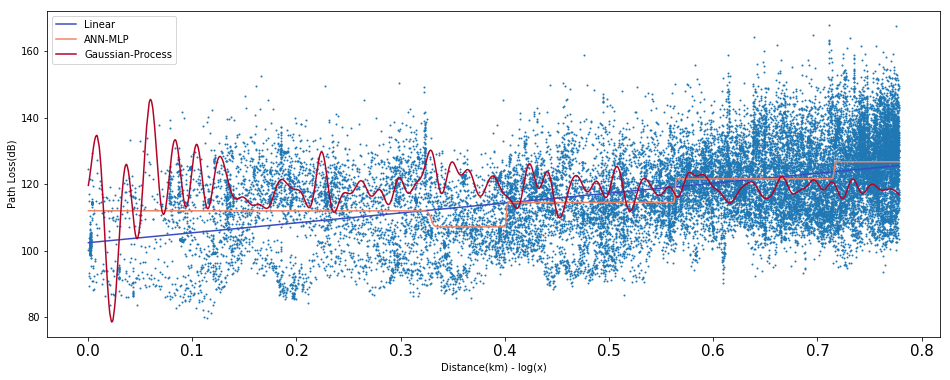

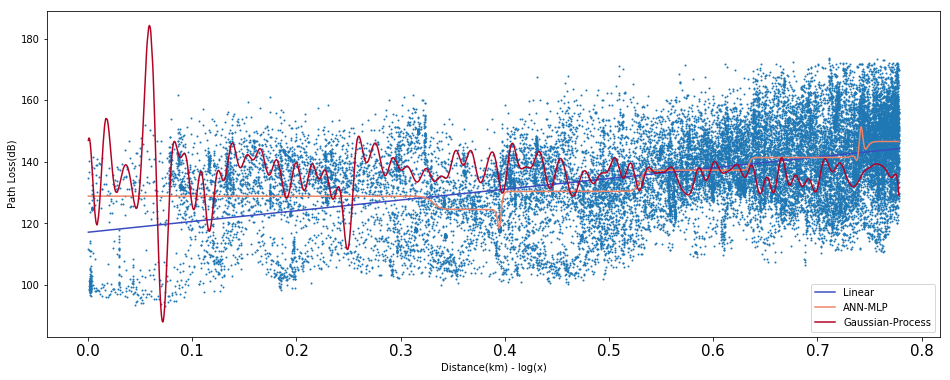

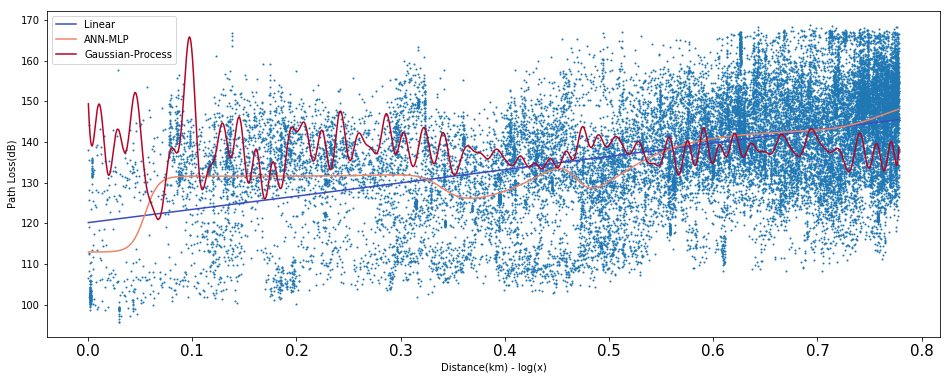

In [222]:
%autoreload
models = [linear_400_model, ann_relu_400_model, gp_rbf_400_model]
mlp_multiple_models_train_graph(models, X_train_m_400, y_train_m_400)
models = [linear_1399_model, ann_relu_1399_model, gp_rbf_1399_model]
mlp_multiple_models_train_graph(models, X_train_m_1399, y_train_m_1399)
models = [linear_2249_model, ann_relu_2249_model, gp_rbf_2249_model]
mlp_multiple_models_train_graph(models, X_train_m_2249, y_train_m_2249)

<Paju - Winter> ANN-Sigmoid (dist<=6000m)


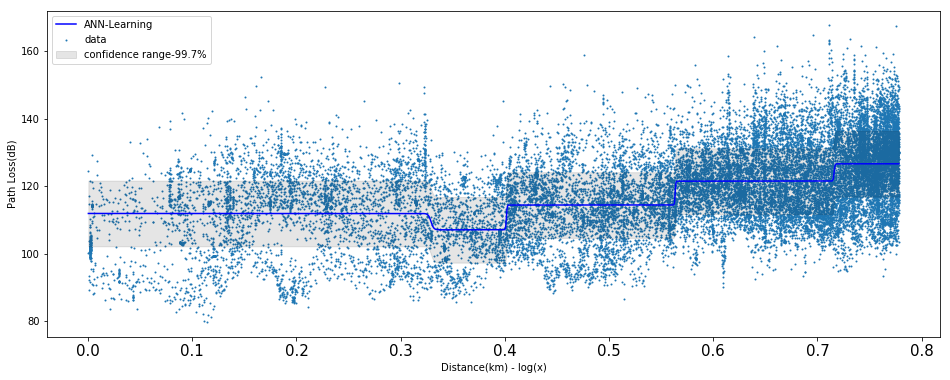

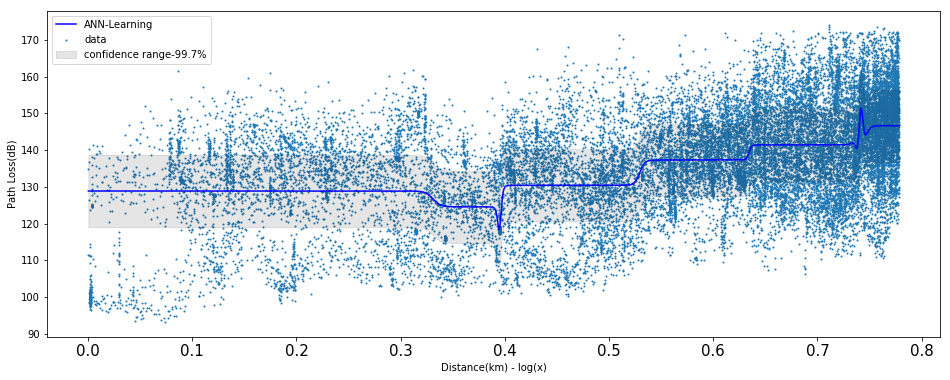

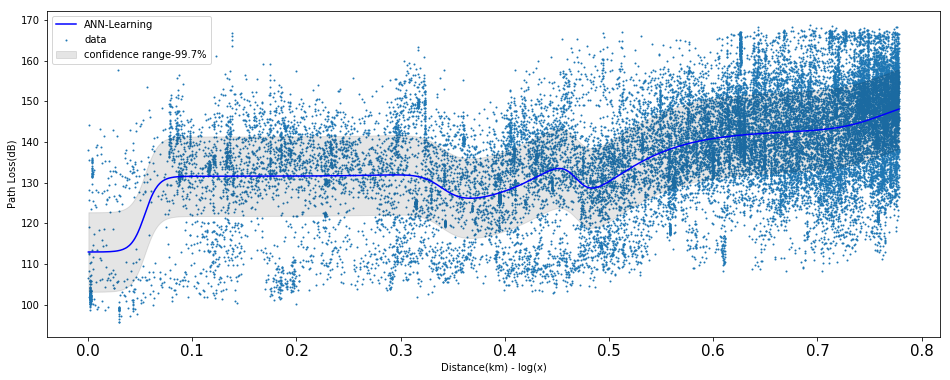

In [223]:
%autoreload
print("<Paju - Winter> ANN-Sigmoid (dist<=6000m)")
# mlp_train_multi_3dgraph_comb(ann_relu_model, dataX_m, dataY_m, X_train_m, ['0.4', '1.399','2.249'])

pred_train_400 = ann_relu_400_model.predict(X_train_m_400)
pred_train_1399 = ann_relu_1399_model.predict(X_train_m_1399)
pred_train_2249 = ann_relu_2249_model.predict(X_train_m_2249)

pred_train_dataset = [pred_train_400, pred_train_1399, pred_train_2249]
data_std = [3*std_400.mean(), 3*std_1399.mean(), 3*std_2249.mean()]

ann_train_graph(X_train_m_400, y_train_m_400, pred_train_400, X_train_m_400[:,0], y_train_m_400, True, 3*std_400.mean())
ann_train_graph(X_train_m_1399, y_train_m_1399, pred_train_1399, X_train_m_1399[:,0], y_train_m_1399, True, 3*std_1399.mean())
ann_train_graph(X_train_m_2249, y_train_m_2249, pred_train_2249, X_train_m_2249[:,0], y_train_m_2249, True, 3*std_2249.mean())